In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks')

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore Data

In [5]:
print(f"DF shape : {train.shape}\n=========================")
print(f"DF info : {train.info()}\n=========================")
print(f"DF columns : {train.columns}\n=========================")
print(f"Type of each column : {train.dtypes}\n=========================")
print(f"How much missing value in every column : {train.isna().sum()}\n=========================")

DF shape : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
DF info : None
DF columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Type of each column : PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket 

#### First some basic questions:

1.) Who were the passengers on the Titanic? (Ages, Gender, Class,..etc) <br>
2.) What deck were the passengers on and how does that relate to their class?<br> 
3.) Where did the passengers come from?<br>
4.) Who was alone and who was with family?<br>
5.) What factors helped someone survive the sinking?

### 1. Who were the passengers on the titanic?

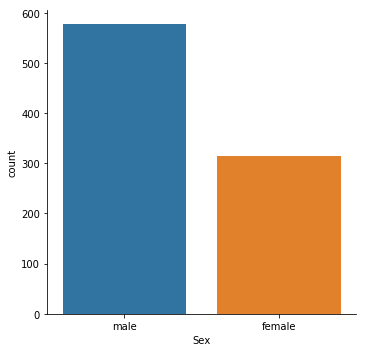

In [21]:
#First, check gender
sns.catplot('Sex', data=train, kind='count')

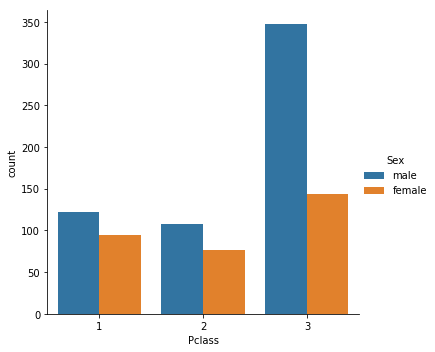

In [24]:
# Now seperate the gender by classes
sns.catplot('Pclass', data=train, kind='count', hue='Sex')

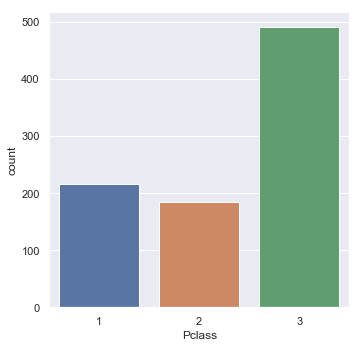

In [126]:
sns.catplot('Pclass',data=train,kind='count')

In [26]:
# Lets check age, we create a new column 'Person' in which every person under 16 is child

train['Person'] = train.Sex
train.loc[train['Age'] < 16, 'Person'] = 'Child'
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


In [31]:
# checking destribution
print(f"Person categories : {train.Person.unique()}\n====================")
print(f"Distribution of Person : {train.Person.value_counts()}\n====================")
print("Mean Age : %.3f\n====================" %(train.Age.mean()))

Person categories : ['male' 'female' 'Child']
Distribution of Person : male      537
female    271
Child      83
Name: Person, dtype: int64
Mean Age : 29.699


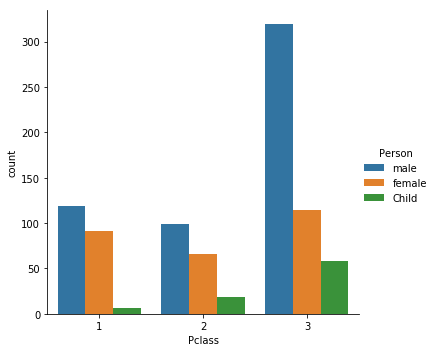

In [32]:
sns.catplot('Pclass', data=train, hue='Person', kind='count')

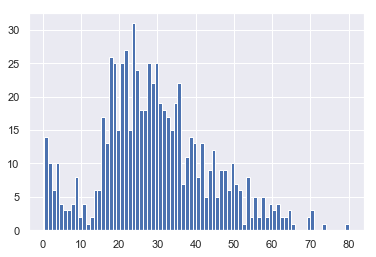

In [40]:
# check age
train['Age'].hist(bins=80)

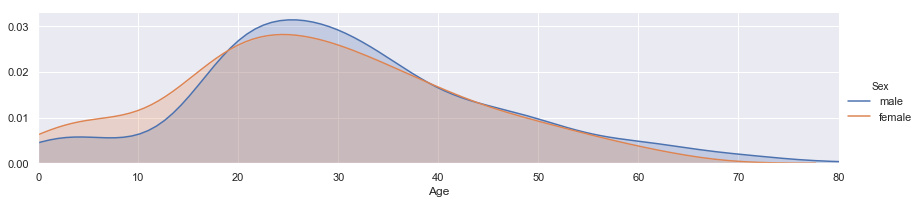

In [52]:
# 比較兩個性別的 age kdeplot
fig = sns.FacetGrid(train, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = train['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

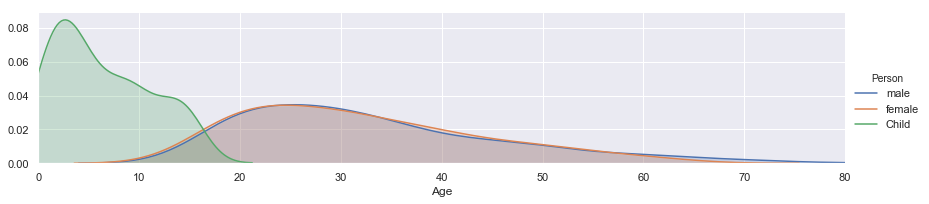

In [53]:
# 比較Person的 age kdeplot
fig = sns.FacetGrid(train, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = train['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

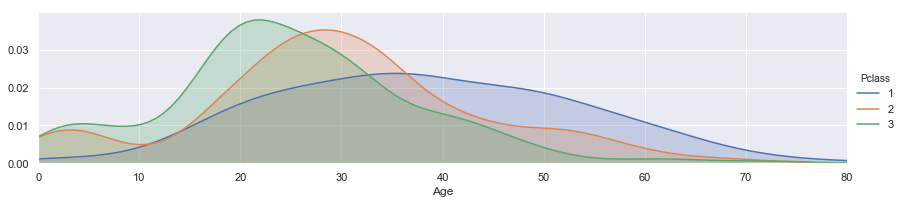

In [54]:
# 比較 Pclass 的 age kdeplot
fig = sns.FacetGrid(train, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = train['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

### We've gotten some pictures of who the passengers are based on Age, Pclass, Sex

## 2. What deck were the passengers on and how does that relate to their class?

In [58]:
# We can see that cabin column has information on the deck, but it has many NAN
# First, we drop NAN

deck = train['Cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

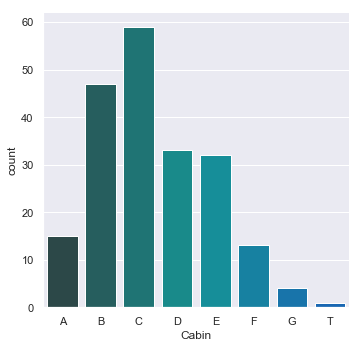

In [86]:
# Only first letter has the information we need (A,B,C... can classify its level)
levels = deck.apply(lambda x : x[0])

cabinDF = pd.DataFrame(levels, columns=['Cabin'])
cabinDF.sort_values(by='Cabin', inplace=True)

sns.catplot('Cabin', data=cabinDF, kind='count', palette='winter_d')

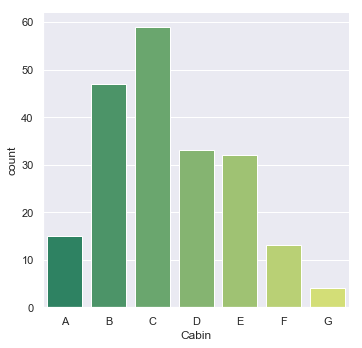

In [94]:
cabinDF = cabinDF[cabinDF['Cabin'] != 'T']
sns.catplot('Cabin', data=cabinDF, kind='count', palette='summer')

### Now we know the distribution of decks.

Which decks are 1st class?

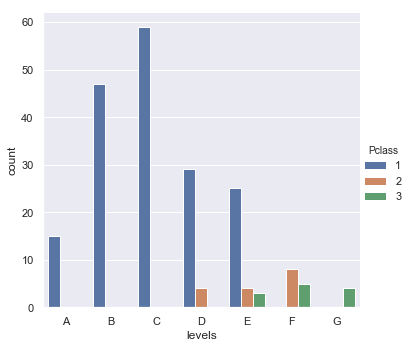

In [124]:
trained = train.copy()
trained['levels'] = cabinDF

sns.catplot('levels', data=trained, kind='count', hue='Pclass',order=['A','B','C','D','E','F','G'])

### So, passengers live in deck A, B, C are 1st class, and many of deck D, E passengers were 1st class too.<br>
Because there are null value in cabin information, so it looks like 1st passengers is the most, but actually only 1st class passenger had more information of cabin, many of 2nd and 3rd class are null value

In [133]:
(trained['Pclass'] == 1).sum()

(trained['Pclass'] == 1 & trained['levels'].notnull()).sum()

print('Ratio of 1st passengers whose cabin info is not null : %.3f' %((trained['Pclass'] == 1 & trained['levels'].notnull()).sum() / (trained['levels'].notnull()).sum()))


Ratio of 1st passengers whose cabin info is not null : 0.862


## 3. Where did the passengers come from?

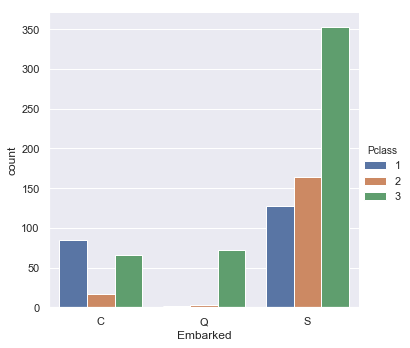

In [97]:
sns.catplot('Embarked', data=train, hue='Pclass', kind='count', order=['C','Q','S'])

### An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class.

## 4. Who was alone and who was with family?

In [99]:
train['alone'] = train['SibSp'] + train['Parch']
train['alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: alone, Length: 891, dtype: int64

In [101]:
train.loc[train['alone'] >0 , 'alone'] = 'With Family'
train.loc[train['alone'] == 0 , 'alone'] = 'Alone'
train['alone'].head()

0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: alone, dtype: object

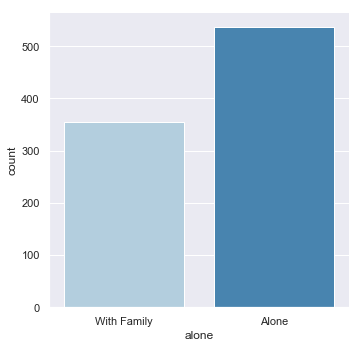

In [102]:
sns.catplot('alone', data=train, kind='count', palette='Blues')

## 5. What factors helped someone survive the sinking?

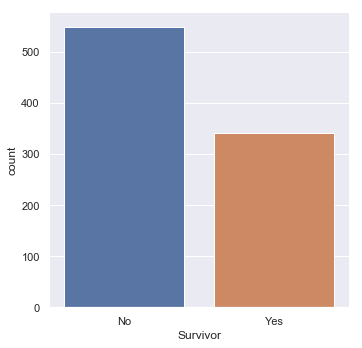

In [107]:
train['Survivor'] = train['Survived'].map({1:"Yes", 0:"No"})

sns.catplot('Survivor', data=train, kind='count')

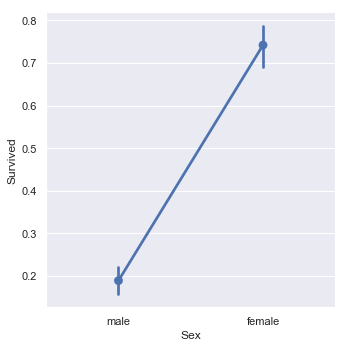

In [160]:
sns.catplot('Sex','Survived', data=train, kind='point')

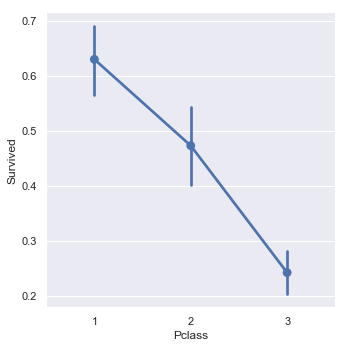

In [109]:
# Lets see if the class of the passengers had an effect on their survival rate
sns.catplot('Pclass', 'Survived', data=train, kind='point')

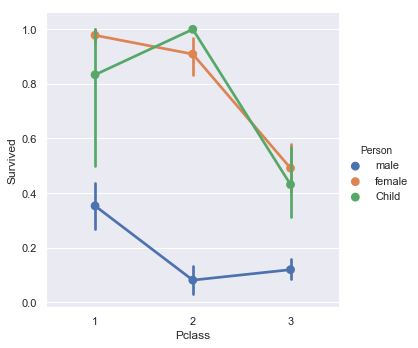

In [110]:
sns.catplot('Pclass', 'Survived', data=train, kind='point',hue='Person')

For this data it looks like being a male or being in 3rd class were both not favourable for survival. Lets see age.

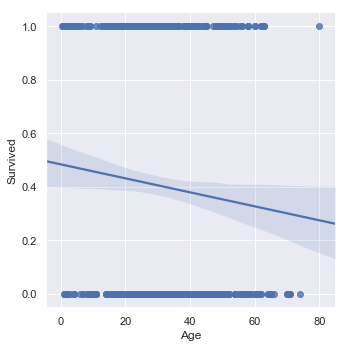

In [111]:
sns.lmplot('Age','Survived',data=train)

From the data, we can see that the older the passenger was, the less likely they survived.Lets take a look at the effect of class and age.

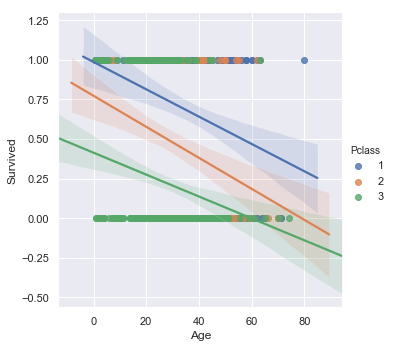

In [112]:
sns.lmplot('Age','Survived',data=train, hue='Pclass')

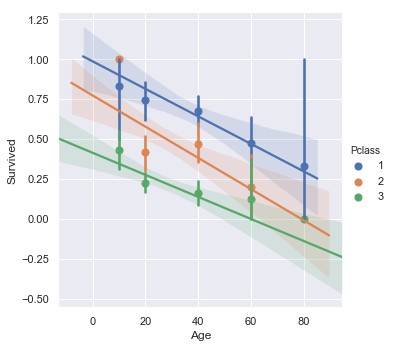

In [115]:
generation = [10,20,40,60,80]
sns.lmplot('Age','Survived',data=train, hue='Pclass',x_bins=generation)

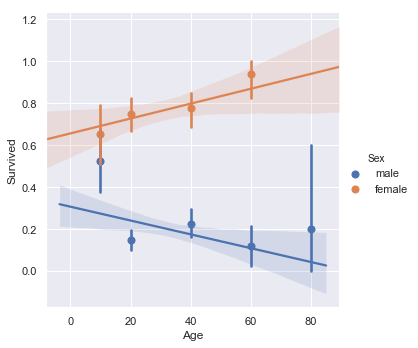

In [116]:
sns.lmplot('Age','Survived',data=train, hue='Sex',x_bins=generation)

### We've gotten some really great insights on how age, gender, and class all related to a passengers chance of survival.